<a href="https://colab.research.google.com/github/FasikuChristian/Christian_Data_analytics/blob/main/Copy_of_university_enrollment_ass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

In [3]:
!pip install scikit-learn

In [4]:
data  = pd.read_csv('ml_data.csv')
data

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [5]:
#checking for missing data
data.isnull().sum()

,0
course_id,0
course_type,0
year,0
enrollment_count,0
pre_score,0
post_score,185
pre_requirement,891
department,0


In [7]:
#filling 'none' to empty space in column 'pre_requirement
Replacement = "None"
data2 = data["pre_requirement"].fillna(Replacement)
data["pre_requirement"] = data2

In [8]:
data

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,None,Science
2,3,online,2016,257,57.24,80.0,None,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,None,Technology
1847,1848,online,2011,257,76,81.0,None,Mathematics
1848,1849,online,2013,256,20.67,66.0,None,Math


In [9]:
#filing empty post_score with zeros
Missing_score = data["post_score"].fillna(0)
data["post_score"] = Missing_score

In [10]:
#saving processed data
data.to_csv("data_clean.csv", index = False)

In [11]:
#2 distribution of enrollment_count
data2 = pd.read_csv("data_clean.csv")

In [12]:
course_online = data2[data2['course_type'] == 'online']
course_classroom = data2[data2['course_type'] != 'online']
course_classroom

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
9,10,classroom,2016,180,83.53,79.0,Beginner,Engineering
10,11,classroom,2022,180,9.84,74.0,Beginner,Engineering
...,...,...,...,...,...,...,...,...
1822,1823,classroom,2013,170,75.64,0.0,Intermediate,Engineering
1829,1830,classroom,2020,161,5.22,72.0,Intermediate,Math
1830,1831,classroom,2017,175,32.27,77.0,Beginner,Technology
1837,1838,classroom,2015,155,30.55,75.0,Intermediate,Science


In [13]:
import matplotlib.pyplot as plt

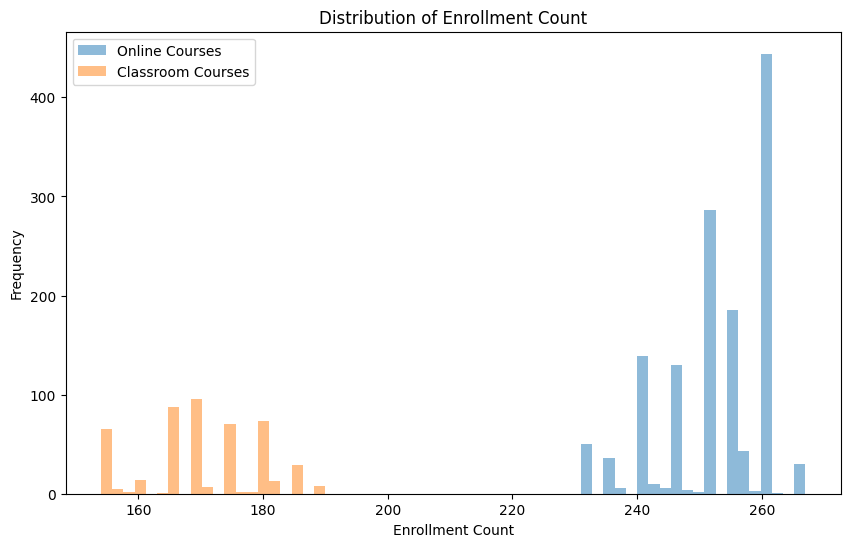

In [14]:
plt.figure(figsize=(10, 6))

# Plot histogram for online courses
plt.hist(course_online['enrollment_count'], bins=20, alpha=0.5, label='Online Courses')

# Plot histogram for classroom courses
plt.hist(course_classroom['enrollment_count'], bins=20, alpha=0.5, label='Classroom Courses')

plt.title('Distribution of Enrollment Count')
plt.xlabel('Enrollment Count')
plt.ylabel('Frequency')
plt.legend()

plt.show()


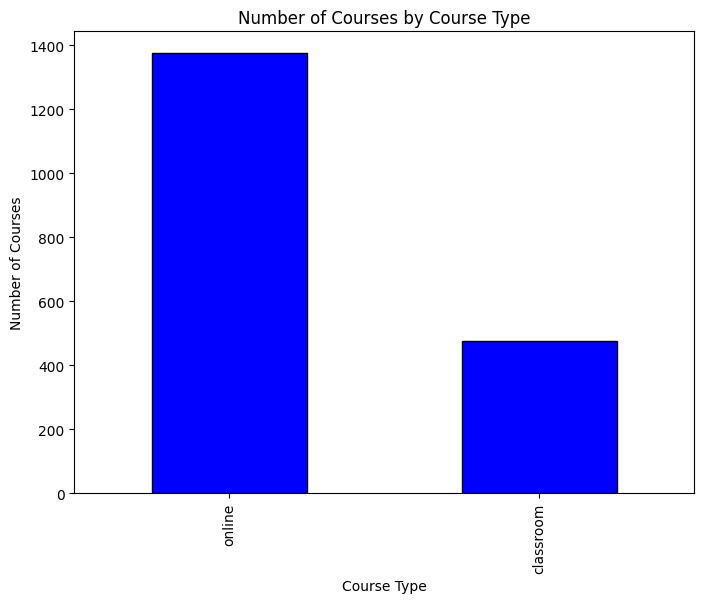

Course type with the most observations: online
The observations are balanced across types.


In [15]:
#3 Count the number of courses for each type
course_type_counts = data2['course_type'].value_counts()

# Creating a bar plot
plt.figure(figsize=(8, 6))
course_type_counts.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Number of Courses by Course Type')
plt.xlabel('Course Type')
plt.ylabel('Number of Courses')
plt.show()

# Print the type with the most observations
most_common_type = course_type_counts.idxmax()
print("Course type with the most observations:", most_common_type)

# Explain whether the observations are balanced across types
is_balanced = all(count >= 0.2 * data2.shape[0] for count in course_type_counts)
if is_balanced:
    print("The observations are balanced across types.")
else:
    print("The observations are not balanced across types.")

In [16]:
#4 relationship btw course type and enrollment coutnt

In [17]:
course_type_counts

,count
course_type,
online,1375
classroom,475


<Figure size 800x600 with 0 Axes>

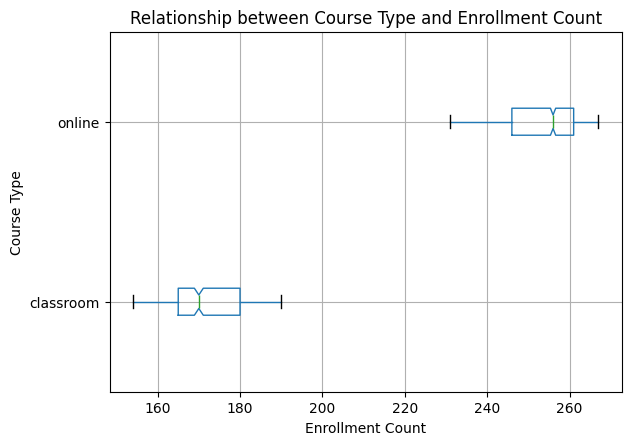

In [18]:
plt.figure(figsize=(8, 6))
data2.boxplot(column='enrollment_count', by='course_type', vert=False, notch=True)
plt.title('Relationship between Course Type and Enrollment Count')
plt.xlabel('Enrollment Count')
plt.ylabel('Course Type')
plt.suptitle("")  # Suppress the default title
plt.show()

In [19]:
# 5
# The task of predicting how many students will enroll in a course is a regression problem.
#In regression, the goal is to predict a continuous numerical output based on input features.

In [20]:
#6 building a baselinee model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
data2

,course_id,course_type,year,enrollment_count,pre_score,post_score,pre_requirement,department
0,1,classroom,2018,165,28.14,73.0,Beginner,Science
1,2,classroom,2020,175,79.68,86.0,NaN,Science
2,3,online,2016,257,57.24,80.0,NaN,Mathematics
3,4,online,2013,251,97.67,75.0,Beginner,Technology
4,5,classroom,2019,165,39.75,76.0,Beginner,Science
...,...,...,...,...,...,...,...,...
1845,1846,classroom,2018,155,60.01,81.0,Intermediate,Science
1846,1847,online,2016,261,94.27,85.0,NaN,Technology
1847,1848,online,2011,257,76,81.0,NaN,Mathematics
1848,1849,online,2013,256,20.67,66.0,NaN,Math


In [22]:
from sklearn.model_selection import train_test_split
input = data2[['course_type']]
targets = data2['enrollment_count']

# Split the dataset into features (X) and target (y)
X =pd.get_dummies(input)
X = pd.DataFrame(X)
y = targets
model = LinearRegression()



In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22)

In [24]:
model.fit(X_train, y_train)

LinearRegression()

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)  # RMSE
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 82.69576383023649
R-squared: 0.9404526884928942


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


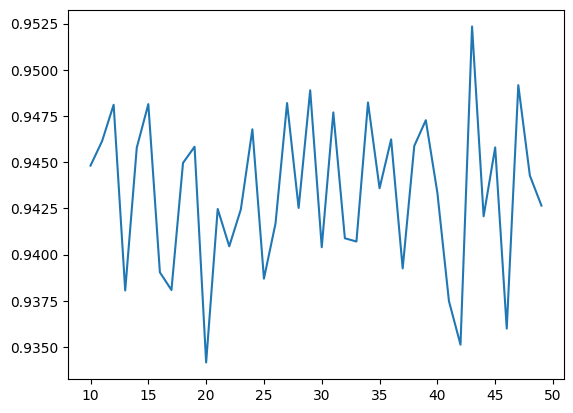

In [26]:
# 7 checking model performance
model_score_mean =[]
model_score_r2 = []
for values in list(range(10, 50)):
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=values)
  reg = LinearRegression()
  reg.fit(X_train, y_train)
  predict = reg.predict(X_test)
  mae = mean_absolute_error(y_test, predict)
  r2 = r2_score(y_test, predict)
  model_score_mean.append(mae)
  model_score_r2.append(r2)


plt.plot(list(range(10, 50)), model_score_r2)




In [27]:
#adusting model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)
model = LinearRegression()
model.fit(X_train, y_train)
pred_y = model.predict(X_test)
r2_score(y_test, pred_y)


0.9523420516057808

including other parameter to make the model perform better 8 to 10

In [28]:
a =  ['course_id', 'year', 'department']
#i train my model withou pre_requirement, the result was terrible. the following are the colomn that greatly improve the model
#course_type	enrollment_count	pre_score	post_score	pre_requirement

In [29]:
data_ml = data2.drop( columns = a)
data_ml

,course_type,enrollment_count,pre_score,post_score,pre_requirement
0,classroom,165,28.14,73.0,Beginner
1,classroom,175,79.68,86.0,NaN
2,online,257,57.24,80.0,NaN
3,online,251,97.67,75.0,Beginner
4,classroom,165,39.75,76.0,Beginner
...,...,...,...,...,...
1845,classroom,155,60.01,81.0,Intermediate
1846,online,261,94.27,85.0,NaN
1847,online,257,76,81.0,NaN
1848,online,256,20.67,66.0,NaN


In [30]:
data_ml = pd.get_dummies(data_ml)


In [31]:
X1 = data_ml.drop(columns = 'enrollment_count')
y1 = data_ml['enrollment_count']

In [32]:
x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 43)
model_2 = LinearRegression()
model_2.fit(x_train, y_train)
y_predict = model_2.predict(x_test)
r2_score(y_test, y_predict)


0.9821506136470923

In [33]:
from sklearn.metrics import mean_squared_error as np

In [37]:
import numpy as np

In [38]:
mse_l = mean_squared_error(y_test, y_predict)
rmse_l = np.sqrt(mse_l)
print(rmse_l)

5.3644960623167774


(98.0, 100.0)

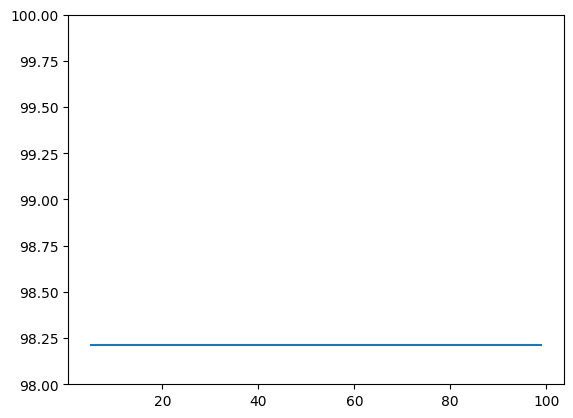

In [39]:
#checking for the best random state
model_percentage_performance = []
for value in list(range(5, 100)):
  x_train, x_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 43)
  model_2 = LinearRegression()
  model_2.fit(x_train, y_train)
  y_predict = model_2.predict(x_test)
  performance_value = r2_score(y_test, y_predict) * 100
  model_percentage_performance.append(performance_value)
plt.plot(list(range(5, 100)), model_percentage_performance)
plt.ylim(98, 100)